<a href="https://colab.research.google.com/github/JennieAurellia/Asleb_SciCom/blob/main/Latihan%20Quiz%202.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [134]:
import numpy as np
import matplotlib.pyplot as plt

# Gauss Seidel

In [135]:
def gauss_seidel(x, y, tol=0.096, iter=8):
  x = np.array(x)
  y = np.array(y)

  real_diag = np.array(np.diag(x))
  diag = np.array(np.diag(np.abs(x)))
  np.fill_diagonal(x,0)
  off_diag = np.sum(np.abs(x), axis=1)

  if not np.all(diag > off_diag):
    print('Not diagonally dominant')
    return False

  x = -x
  old = np.zeros(np.size(x[0]))

  for i in range(iter):
    new = np.array(old)

    for idx, row in enumerate(x):
      new[idx] = (y[idx] + np.dot(row, new)) / real_diag[idx]
    print(f'Iter #{i+1}: {new}')

    dx = np.sqrt(np.dot(new-old, new-old))

    if dx < tol:
      print('Convergen')
      return

    old = new

  print('Not Convergen')
  return

In [136]:
Xs = [
    [
        [10, 2, 1],
        [1, -8, 2],
        [2, 3, -9]
    ],
    [
        [-12, 2, -3],
        [3, 9, 1],
        [-2, 1, 10]
    ],
    [

        [11, -1, 3],
        [2, 7, -2],
        [3, 2, 9]
    ],
    [
        [-10, 5, 1],
        [-4, 11, -3],
        [-2, 3, -8]
    ],
    [
        [8, 1, -2],
        [-3, 10, 2],
        [-1, -2, 9]
    ]
]

Ys = [
    [40, 1150, 18],
    [25, -10, 15],
    [30, -10, 12],
    [80, -700, 140],
    [15, 10, -5]
]


In [137]:
for i, (x,y) in enumerate(zip(Xs, Ys)):
  print(f'Equation #{i+1}:')
  gauss_seidel(x, y)
  print()

Equation #1:
Iter #1: [   4.         -143.25        -48.86111111]
Iter #2: [  37.53611111 -151.27326389  -44.08306327]
Iter #3: [  38.6629591  -149.93789593  -43.38752995]
Iter #4: [  38.32633218 -149.80609097  -43.41840095]
Iter #5: [  38.30305829 -149.81671795  -43.42711525]
Convergen

Equation #2:
Iter #1: [-2.08333333 -0.41666667  1.125     ]
Iter #2: [-2.43402778 -0.42476852  1.0556713 ]
Iter #3: [-2.41804591 -0.42239262  1.05863008]
Convergen

Equation #3:
Iter #1: [ 2.72727273 -2.20779221  0.91486291]
Iter #2: [ 2.27705628 -1.81776953  0.97826336]
Iter #3: [ 2.29522185 -1.80484528  0.96933611]
Convergen

Equation #4:
Iter #1: [ -8.         -66.54545455 -40.45454545]
Iter #2: [-45.31818182 -91.14876033 -40.35123967]
Iter #3: [-57.60950413 -95.59015778 -38.94393313]
Iter #4: [-59.6894722  -95.96269893 -38.56364405]
Iter #5: [-59.83771387 -95.91288978 -38.5079052 ]
Iter #6: [-59.80723541 -95.8866052  -38.5056681 ]
Convergen

Equation #5:
Iter #1: [1.875  1.5625 0.    ]
Iter #2: [ 1

# Least Square Regression

<function matplotlib.pyplot.show(close=None, block=None)>

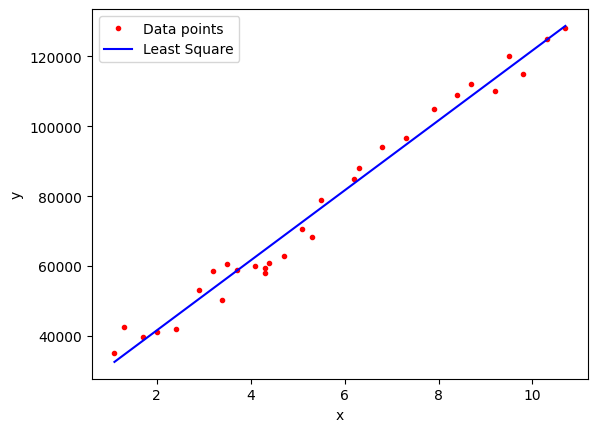

In [151]:
x = [1.1, 1.3, 1.7, 2.0, 2.4, 2.9, 3.2, 3.4, 3.5, 3.7, 4.1, 4.3, 4.3, 4.4, 4.7, 5.1,
        5.3, 5.5, 6.2, 6.3, 6.8, 7.3, 7.9, 8.4, 8.7, 9.2, 9.5, 9.8, 10.3, 10.7]

y = [35010.0, 42500.0, 39800.0, 41050.0, 42100.0, 53200.0, 58700.0, 50200.0, 60500.0, 59000.0,
        60100.0, 58000.0, 59500.0, 61000.0, 63000.0, 70500.0, 68200.0, 79000.0, 85000.0, 88000.0,
        94000.0, 96500.0, 105000.0, 109000.0, 112000.0, 110000.0, 120000.0, 115000.0, 125000.0, 128000.0]

x = np.array(x)
y = np.array(y)

X = np.vstack([x, np.ones(len(x))]).T
alpha = np.dot(np.dot(np.linalg.inv(np.dot(X.T, X)), X.T), y)

plt.plot(x, y, '.r')
plt.plot(x, alpha[0]*x + alpha[1], 'b')
plt.legend(["Data points", "Least Square"])
plt.xlabel("x")
plt.ylabel("y")
plt.show

# Reimann Integral

In [139]:
def f(x):
  return x**4 - 13*x**3 + 36

In [140]:
a = -2
b = 2
n = 50
lebar_kotak = (b-a)/(n-1)
x = np.linspace(a, b, n)
y = f(x)

In [141]:
right_reimann = lebar_kotak * sum(y[:n-1])
print(right_reimann)
print()

left_reimann = lebar_kotak * sum(y[1:])
print(left_reimann)
print()

x_mid = (x[:n-1] + x[1:]) / 2
y_mid = f(x_mid)
midpoint = lebar_kotak * sum(y_mid)
print(midpoint)
print()

sisi_sejajar = y[0] + 2*sum(y[1:n-1]) + y[n-1]
trapezoid = lebar_kotak * sisi_sejajar /2
print(trapezoid)

165.3253307442876

148.3457389075529

156.7822348074114

156.83553482592026


# Newton Raphson

In [142]:
def f(x):
  return 15*x**5 + 6*x**4 - 9

def g(x):
  return 75*x**4 + 24*x**3

In [149]:
def newton_raphson(x0, tol=0.096, iter=25):
  for i in range(iter):
    x1 = x0 - (f(x0) / g(x0))

    if(np.abs(f(x1)) < tol):
      print(f'The root of equation is {x1}')
      return

    print(f'Iteration #{i+1}: new root = {x1} with result {f(x1)}')
    x0 = x1

In [150]:
newton_raphson(3)

Iteration #1: new root = 2.3868808567603748 with result 1347.852461597219
Iteration #2: new root = 1.898656178466907 with result 439.07486544949563
Iteration #3: new root = 1.5131349231884295 with result 141.43451086983134
Iteration #4: new root = 1.2161962706387888 with result 44.03957418227888
Iteration #5: new root = 1.0037132952031504 with result 12.370189821891714
Iteration #6: new root = 0.8804901927302695 with result 2.5442469253948037
Iteration #7: new root = 0.839093484390474 with result 0.2137564342527316
The root of equation is 0.8349314235732447
